In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Part 1: Data Exploration and Preparation

a. Load the Titanic DataFrame from Seaborn using the load_dataset(‘titanic’) method.

In [4]:
titanic_df=sns.load_dataset('titanic')
titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


b. For all features in the DataFrame, identify the number of instances with null values and the 
percentage of the feature that is null. Hint: one feature is mostly nulls (> 75%).

In [5]:
null_counts = titanic_df.isnull().sum()
null_counts_percentages= (null_counts/len(titanic_df))*100

print("Null counts:\n", null_counts)
print("\nNull percentages:\n", null_counts_percentages)

Null counts:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Null percentages:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


c. Remove the feature that is mostly null values

In [6]:
if 'deck' in titanic_df.columns:
    titanic_df.drop(columns=['deck'], inplace=True)
else:
    print("Column 'deck' not found in the dataset")

d. This dataset includes four redundant features (Separate features that represent equivalent 
information). Review the features to identify these four pairs, and conduct quantitative analysis to 
verify the direct relationship between the pairings. Hint: drop_duplicates is pretty straightforward.

In [8]:
print("\nRedundant feature analysis:")
print("\nClass vs PClass unique pairs:")
print(titanic_df[['class', 'pclass']].drop_duplicates())
print("\nEmbarked vs Embarked_Town unique pairs:")
print(titanic_df[['embarked', 'embark_town']].drop_duplicates())
print("\nwho vs adult_male unique pairs:")
print(titanic_df[['who', 'adult_male']].drop_duplicates())
print("\nwho vs alive survived:")
print(titanic_df[['alive', 'survived']].drop_duplicates())


Redundant feature analysis:

Class vs PClass unique pairs:
    class  pclass
0   Third       3
1   First       1
9  Second       2

Embarked vs Embarked_Town unique pairs:
   embarked  embark_town
0         S  Southampton
1         C    Cherbourg
5         Q   Queenstown
61      NaN          NaN

who vs adult_male unique pairs:
     who  adult_male
0    man        True
1  woman       False
7  child       False

who vs alive survived:
  alive  survived
0    no         0
1   yes         1


e. Keep the survived, embarked_town, adult_male and pclass features, and drop the redundant features 
found in Part 1D that pairs to each of these four. Hint: Four features will be dropped.

In [9]:
# Redundant pairs to embarked_town, adult_male, pclass, survived
drop_columns = ['embarked', 'who', 'class', 'alive']
titanic_df.drop(columns=drop_columns, inplace=True)

f. The feature adult_male was engineered from other features in the dataset. In a markdown cell, 
document the logic to achieve adult_male. The logic should resemble: “adult_male is engineered 
from features X and Y, such that if X is greater than, or equal to BLAH, and Y is equal to BLEH, then 
adult_male is True, else adult_male is False. Hint: The feature name should offer a clue to the 
features employed. Also, consider the groupby functionality. 

##`adult_male` is engineered from `age` and `sex`, such that if `age` >= 18 and `sex` == 'male', then `adult_male` is True, else False.

g. Drop the adult_male feature from the DataFrame

In [10]:
titanic_df = titanic_df.drop(columns=['adult_male'])

h. Explore the data and answer the following questions in markdown cells:
i. Did more women or men die on the Titanic? 
Show this as 1) a count by sex, and 2) a percentage by sex (that is, of the total number of male 
passengers, what percentage of males died? And for the total number of female passengers, what 
percentage of females did not survive?)


In [11]:
survivor_counts_sex = titanic_df.groupby('sex')['survived'].value_counts().unstack()
survivor_percentages = (survivor_counts_sex.div(
    survivor_counts_sex.sum(axis=1), axis=0) * 100)
print('survivor counts by sex')
print(survivor_counts_sex)
print('\nSurvivor Percentages')
print(survivor_percentages)

survivor counts by sex
survived    0    1
sex               
female     81  233
male      468  109

Survivor Percentages
survived          0          1
sex                           
female    25.796178  74.203822
male      81.109185  18.890815


## More men died in the titanic as shown  men compared to women.

ii. What percentages of passengers survived by passenger class?


In [12]:
survivor_by_class = titanic_df.groupby(
    'pclass')['survived'].value_counts(normalize=True).unstack()
survivor_percentages_class = (survivor_by_class.div(
    survivor_by_class.sum(axis=1), axis=0) * 100)
survivor_percentages_class

survived,0,1
pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


iii. Describe the distribution of fare values


In [13]:
titanic_df['fare'].describe().T

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

iv. Describe the distribution of non-null age values


In [14]:
titanic_df['age'].dropna().describe().T


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


v. What is the median age for each passenger class?


In [15]:
median_age_pclass = titanic_df.groupby('pclass')['age'].median()
median_age_pclass

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

vi. Plot the distributions of age by passenger class in box plots

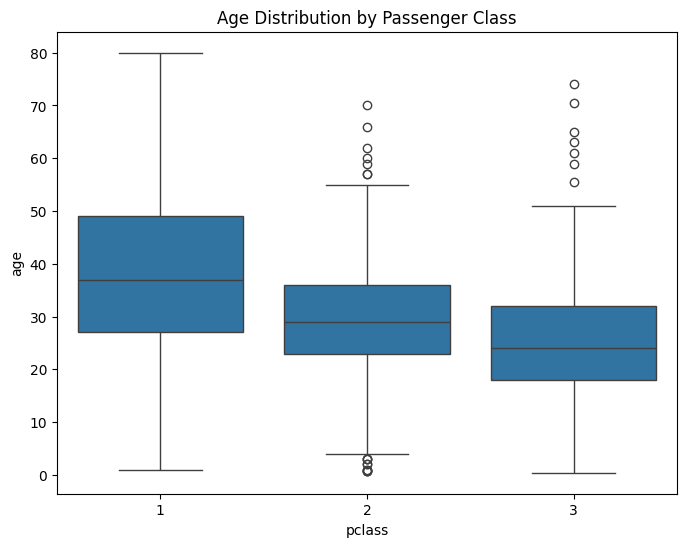

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=titanic_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

i. Null values are still present in the data set. Define a lambda function to impute the null age value
with the median value by passenger class that was identified in Part 1

In [17]:
# titanic_df.isnull().sum()
titanic_df['age'] = titanic_df.groupby('pclass')['age'].transform(
    lambda x: x.fillna(x.median()))

j. Drop the remaining instances in the data set that contain null values and verify that no null values 
exist in the DataFrame. Show the number of rows remaining in the data set. 
Hint: If a sanity check is needed, two rows will be dropped in this step, and 889 rows should remain.

In [18]:
titanic_df = titanic_df.dropna()
print("\nNumber of rows after dropping nulls:", len(titanic_df))


Number of rows after dropping nulls: 889


k. Using either .info() or .dtypes, identify and document which features are of Pandas data type category. 

In [21]:
print("\nFeatures with category dtype:")
print(titanic_df.select_dtypes(include=['category', 'object']).columns)


Features with category dtype:
Index(['sex', 'embark_town'], dtype='object')


l. Review the DataFrame and in a Markdown cell document which other input features could be 
categorical. Keep in mind that the feature survived is the Target variable, so it won’t need converting. 
Hint: The feature pclass is a data type int, but only takes on three unique values. Is this features 
really an int, or is it categorical? Examine the unique values each feature can take, and consider the 
feature name. I found four input features that were categorical.

In [22]:
for col in titanic_df.columns:
    print(f"{col}: {titanic_df[col].nunique()} unique values")

survived: 2 unique values
pclass: 3 unique values
sex: 2 unique values
age: 88 unique values
sibsp: 7 unique values
parch: 7 unique values
fare: 247 unique values
embark_town: 3 unique values
alone: 2 unique values


1. P_class has 3 categorical values,despite being stored as an int.It represents passenger class (1st,2nd,3rd)

 2. Sex has 2 categorical values (male/female)

 3. embark_town has 3 categorical values, representing ports of embarkation

 4. alone has 2 categorical values(yes or no)

m. Using Pandas get_dummies(drop_first=True), convert the identified categorical features to nume
dummies. Show the number of columns in final DataFrame
Hint: If get_dummies is called correctly, this is a single line of code that will replace the original 
categorical features with dummied versions. In get_dummies, the parameter columns means “Column 
names in the DataFrame to be encoded”, so provide a list of the features to encode. Also, set dtype = 
int in get_dummies if you don’t want True/False values.
Finally, the DataFrame should have 11 columns (10 input features and the Target variable).

In [23]:
categorical_features = ['pclass', 'embark_town', 'sex', 'alone']
titanic = pd.get_dummies(
    titanic_df, columns=categorical_features, drop_first=True, dtype=int)
print("\nFinal DataFrame columns:\n", titanic.columns)
print("\nNumber of columns:", len(titanic.columns))
print(titanic.head())


Final DataFrame columns:
 Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_2', 'pclass_3',
       'embark_town_Queenstown', 'embark_town_Southampton', 'sex_male',
       'alone_True'],
      dtype='object')

Number of columns: 11
   survived   age  sibsp  parch     fare  pclass_2  pclass_3  \
0         0  22.0      1      0   7.2500         0         1   
1         1  38.0      1      0  71.2833         0         0   
2         1  26.0      0      0   7.9250         0         1   
3         1  35.0      1      0  53.1000         0         0   
4         0  35.0      0      0   8.0500         0         1   

   embark_town_Queenstown  embark_town_Southampton  sex_male  alone_True  
0                       0                        1         1           0  
1                       0                        0         0           0  
2                       0                        1         0           1  
3                       0                        1         0           0 

n. Finally, employing train_test_split and the clean DataFrame, create training and testing sets. Set 
aside 20% of the data for testing, and consider stratifying on the target variable to maintain the 
imbalance in training and testing sets.

In [25]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=204)

o. Show that the target rate was maintained between the entire data set, training data, and testing data. 
Hint: Target rate is the percentage of one labels in the target data set.

In [26]:
print("\nTarget rate comparison:")
print(f"Full dataset: {y.mean():.3f}")
print(f"Training set: {y_train.mean():.3f}")
print(f"Testing set: {y_test.mean():.3f}")


Target rate comparison:
Full dataset: 0.382
Training set: 0.383
Testing set: 0.382


Part 2: Initial Model Training

a. Instantiate a logistic regression model, a support vector classifier (set probability = True upo
instantiation), and a decision tree classifier into appropriately named variables  Do not fit th
classifiers yet.

In [27]:
log_reg_model = LogisticRegression(random_state=204)
svc_model = SVC(probability=True, random_state=204)
d_tree_model = DecisionTreeClassifier(random_state=204)

b. Using the cross_val_predict functionality from sklearn.model_selection and the training data sets, 
calculate the probability predictions from each of the three classifiers  Store the results int
appropriately named variables. 
Hint: Use method=‘predict_proba’ for all three algorithms

In [ ]:
log_reg_probs = cross_val_predict(
    log_reg_model, X_train, y_train, method='predict_proba')
svc_probs = cross_val_predict(svc_model, X_train, y_train, method='predict_proba')
dtree_probs = cross_val_predict(
    d_tree_model, X_train, y_train, method='predict_proba')

c. Print a classification report, confusion matrix, and ROC-AUC score for each classifi
Hint: Classification report and confusion matrix want class labels for the y_pred parameter  Th
output of cross_val_predict is in terms of class 0 and class 1 probabilities. Consider how to identify 
class label predictions from these probabilities.

In [29]:
def print_metrics(y_true, probs, model_name):
    preds = (probs[:, 1] >= 0.5).astype(int)
    print(f"\n{model_name} Metrics:")
    print("Classification Report:")
    print(classification_report(y_true, preds))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, preds))
    print(f"ROC-AUC Score: {roc_auc_score(y_true, probs[:, 1]):.3f}")


print_metrics(y_train, log_reg_probs, "Logistic Regression")
print_metrics(y_train, svc_probs, "Support Vector Classifier")
print_metrics(y_train, dtree_probs, "Decision Tree")


Logistic Regression Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       439
           1       0.77      0.69      0.72       272

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.78       711
weighted avg       0.80      0.80      0.80       711

Confusion Matrix:
[[382  57]
 [ 85 187]]
ROC-AUC Score: 0.840

Support Vector Classifier Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       439
           1       0.64      0.31      0.41       272

    accuracy                           0.67       711
   macro avg       0.66      0.60      0.59       711
weighted avg       0.66      0.67      0.63       711

Confusion Matrix:
[[392  47]
 [189  83]]
ROC-AUC Score: 0.686

Decision Tree Metrics:
Classification Report:
              precision    recall  f1-score   support

        

Part 3. Model Tuning

a. The training and testing data was not standardized in previous steps. Employing StandardScaler, fi
and transform the training and testing data sets following the protocol discussed in the live sessions.

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

b. Using cross_val_predict with method=‘predict_proba’, the instantiated support vector classier from 
Part 2a, and the scaled Training data, recalculate the probability predictions for the Support Vector 
Classifier, and print the classification report, confusion matrix, and ROC-AUC sco
Hint: Classification report and confusion matrix want class labels as the y_pred, and the output o
cross_val_predict is in terms of class 0 and 1 probabilities

In [31]:
scaled_svc_probs = cross_val_predict(
    svc_model, X_train_scaled, y_train, method='predict_proba')

print("\nSVC Metrics with Scaled Data:")
print_metrics(y_train, scaled_svc_probs, "Support Vector Classifier (Scaled)")


SVC Metrics with Scaled Data:

Support Vector Classifier (Scaled) Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       439
           1       0.85      0.64      0.73       272

    accuracy                           0.82       711
   macro avg       0.83      0.79      0.80       711
weighted avg       0.83      0.82      0.82       711

Confusion Matrix:
[[409  30]
 [ 97 175]]
ROC-AUC Score: 0.831


c. In a Markdown cell, compare and document the differences between evaluation metrics calculated 
from the Support Vector Classifier with unscaled and scaled training data

Scaling the data had a significant positive impact on the SVC's performance. All evaluation metrics (precision, recall, F1-score, accuracy, and ROC-AUC) improved after scaling.

The ROC-AUC score increased by 0.145, indicating that scaling helped the model better separate the two classes.

The confusion matrix shows fewer false positives and false negatives after scaling, meaning the model made fewer errors in classifying both survivors and non-survivors.

The scaled model achieved a better balance between precision and recall, especially for Class 1 (survivors), where recall improved significantly.

d. Using GridSearchCV, the scaled training data, an ROC-AUC scoring metric, and the Support Vector 
Classifier, conduct a grid search using the following parameter space
{‘kernel’: [‘rbf’], ‘gamma’: [0.0001, 0.001, 0.01, 0.1, 1], ‘C’: [1,10,50,100,200,300]}

In [32]:
param_grid = {'kernel': ['rbf'], 'gamma': [
    0.0001, 0.001, 0.01, 0.1, 1], 'C': [1, 10, 50, 100, 200, 300]}
grid_search = GridSearchCV(svc_model, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=204),
             param_grid={'C': [1, 10, 50, 100, 200, 300],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc')

e. From the fitted GridSearchCV object, print the best parameters and the corresponding best score.

In [33]:
print("\nBest parameters from GridSearchCV:", grid_search.best_params_)
print("\nBest ROC-AUC score from GridSearchCV:", grid_search.best_score_)


Best parameters from GridSearchCV: {'C': 300, 'gamma': 0.01, 'kernel': 'rbf'}

Best ROC-AUC score from GridSearchCV: 0.8424642849603664


f. With the best estimator from the fitted GridSearchCV object, make predictions with the scaled testin
data set, and present the classification report, confusion matrix, and ROC-AUC score.

In [34]:
best_model = grid_search.best_estimator_
test_probs = best_model.predict_proba(X_test_scaled)
print("\nFinal Model Performance on Test Set:")
print_metrics(y_test, test_probs, "Best SVC Model")


Final Model Performance on Test Set:

Best SVC Model Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        68

    accuracy                           0.85       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.86      0.85      0.85       178

Confusion Matrix:
[[103   7]
 [ 19  49]]
ROC-AUC Score: 0.865
